GitHub: https://github.com/boris-gans/ML-fundamentals-2025.git

In [32]:
%pip install pandas
%pip install xlrd
%pip install category-encoders
%pip install imblearn
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3.8 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3.8 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3.8 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3.8 install --upgrade pip
Note: you may need to restart the 

In [33]:
import pandas
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from category_encoders import BinaryEncoder
from imblearn.over_sampling import ADASYN
from collections import Counter
plt.style.use('ggplot')

# Task 1: EDA
Load the dataset

In [34]:
data = pandas.read_csv("/Users/borisgans/IE/ML/assingments/assignment_2/bike+sharing+dataset/hour.csv")
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Lets explore each column and identify:
>- Missing values
>- Which are categorical and which are numerical

This will help me in identifying which columns I should delete, impute (non-statistically only, proper data imputation occurs during Task 3) 

In [35]:
print(f"\nColumns: {data.columns}")

# This is great for distinguishing between the categorical and numerical variables
print(f"\nData types:\n {data.dtypes}")


Columns: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Data types:
 instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


From the Readme.txt file we get the following list of column descriptions:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

Already we can see that lots of data cleaning has already been done on this dataset. There is only one non-numerical column, dteday, which has already been split into the season, yr, and mnth columns. Plus, the columns holiday, weekday and workingday have been added to provide better insight into the value of date.

Additionally, it seems that most other columns have already been encoded and/or normalized as well, including: weathersit, temp, atemp, hum and windspeed. Lets explore each column further to validate this assumption.

In [36]:
print(data.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

First thing that I notice is that there is not a single missing value in this dataset. Each column has exactly 17,379 non-null entries, corresponding with the value indicated on the Readme file.

Also, it's easy to see that most values have already been encoded and/or normalized as well. The columns season, yr, mnth, hr, holiday, weekday, workingday, and weathersit have all been encoded. In workingday, for example, we can see that the min/max values are 0 and 1 and the values of each quartile are integers, telling me that this column takes on either a 0 or 1 (as if it were a boolean). The same applies for weathersit, except each value (1 through 4) corresponds to a certain weather condition, as indicated on the Readme file. The other columns, temp, atemp, hum and windspeed have all been normalized. Their max and min values are (almost) all 0 and 1, and on the Readme file its clearly indicated that each column has been divided by its maximum value, ensuring the new maximum values are now 1.

The creators of this dataset pursued normalization, rather than standarization, which is important to note. This may impact the performance of our models:
>- Since Linear Regression assumes its residuals are normally distributed, Standarization (rather than Normalization) helps make the cost function more symmetrical and smoother, and therefore allows the gradient descent algorthim converge faster and more reliably. Since these columns have already been normalized, and therefore rescaled to a fixed range, it means that outliers can have a much greater affect on our model. This is why normalization is preferred for distance-based models like kNN and neural networks. 
>- Random Forests and Gradient Boosting, on the other hand, do not require standarization or normalization. These models split data by thresholds, not distance or direction, which remain valid regardless of the scale or transofrmation applied to the feature. By normalizing the data anyway it likely will not affect the models' performance, although it will remove interpretability in these features.

In conclusion, our dataset is in great shape and we do not need to do any feature scaling or imputation. It is important to consider the affects that the normalized columns will have on our model's performance, however. Since the creators of the dataset specified with what value they divided each column by, it's possible to reverse engineer this and pursue standardization if neccecesary. 

### Temporal Analysis

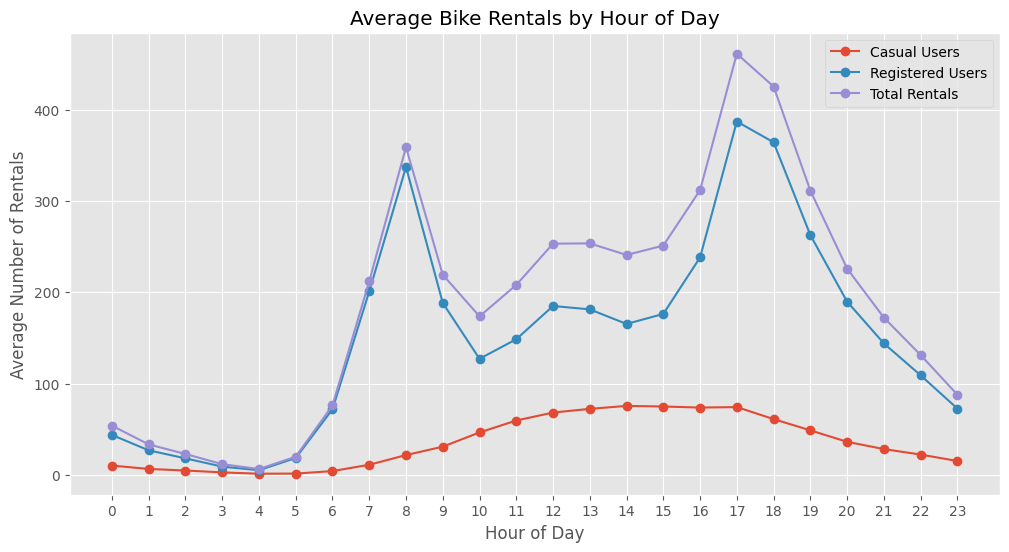

Numer of non-weekdays: 2502
Numer of weekdays: 2479


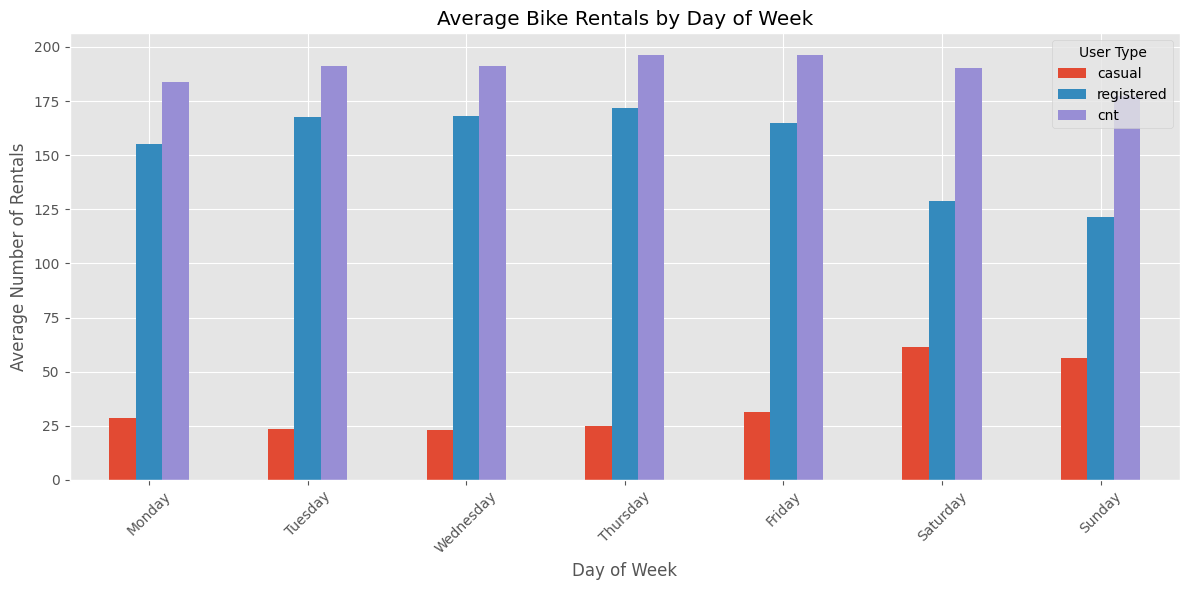

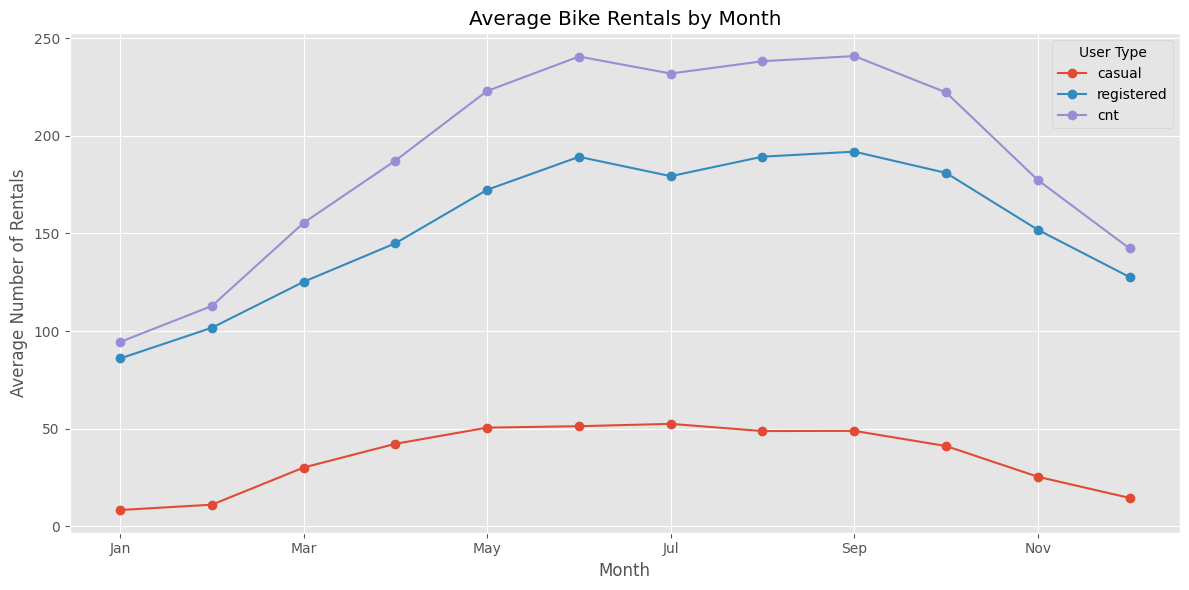

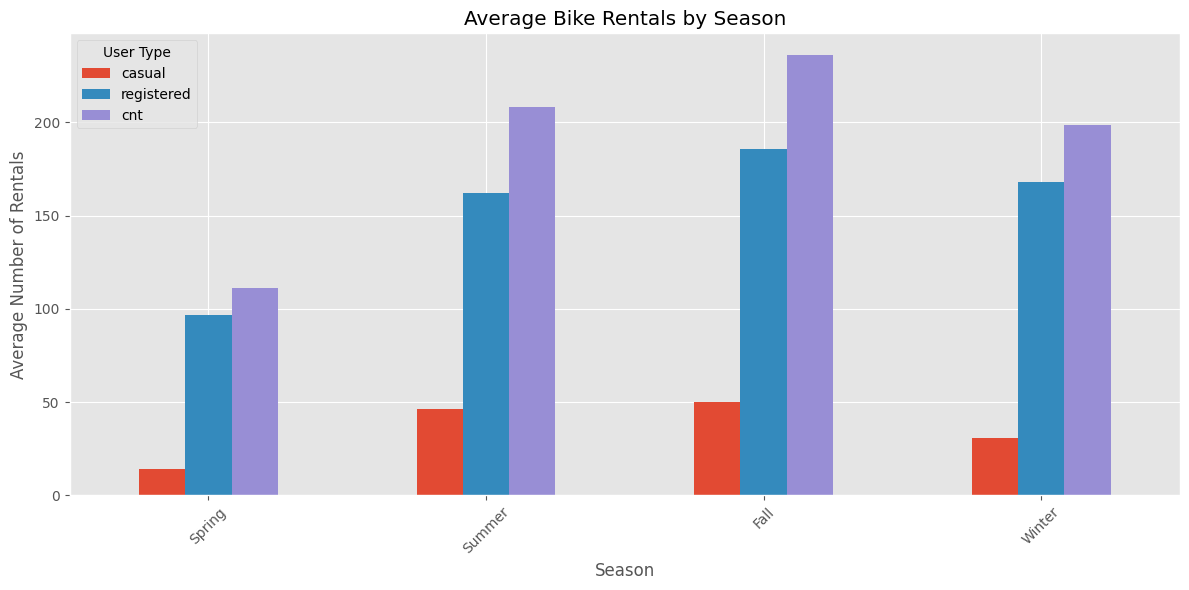

In [37]:
# HOURLY ANALYSIS
hourly_data = data.groupby('hr')[['casual', 'registered', 'cnt']].mean()
plt.figure(figsize=(12, 6))
plt.plot(hourly_data.index, hourly_data['casual'], 'o-', label='Casual Users')
plt.plot(hourly_data.index, hourly_data['registered'], 'o-', label='Registered Users')
plt.plot(hourly_data.index, hourly_data['cnt'], 'o-', label='Total Rentals')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Rentals')
plt.title('Average Bike Rentals by Hour of Day')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

# DAY OF WEEK ANALYSIS
weekday_names = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
data['weekday_name'] = data['weekday'].map(weekday_names)
weekday_data = data.groupby('weekday_name')[['casual', 'registered', 'cnt']].mean()
weekday_data = weekday_data.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print(f"Numer of non-weekdays: {data['weekday'].value_counts()[0]}")
print(f"Numer of weekdays: {data['weekday'].value_counts()[1]}")

plt.figure(figsize=(12, 6))
weekday_data.plot(kind='bar', ax=plt.gca())
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Rentals')
plt.title('Average Bike Rentals by Day of Week')
plt.legend(title='User Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# MONTHLY ANALYSIS
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
              7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
data['month_name'] = data['mnth'].map(month_names)
monthly_data = data.groupby('month_name')[['casual', 'registered', 'cnt']].mean()
monthly_data = monthly_data.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.figure(figsize=(12, 6))
monthly_data.plot(kind='line', marker='o', ax=plt.gca())
plt.xlabel('Month')
plt.ylabel('Average Number of Rentals')
plt.title('Average Bike Rentals by Month')
plt.legend(title='User Type')
plt.grid(True)
plt.tight_layout()
plt.show()

# SEASONAL ANALYSIS
season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
data['season_name'] = data['season'].map(season_names)

seasonal_data = data.groupby('season_name')[['casual', 'registered', 'cnt']].mean()
# Reorder the index to follow seasonal order
seasonal_data = seasonal_data.reindex(['Spring', 'Summer', 'Fall', 'Winter'])

plt.figure(figsize=(12, 6))
seasonal_data.plot(kind='bar', ax=plt.gca())
plt.xlabel('Season')
plt.ylabel('Average Number of Rentals')
plt.title('Average Bike Rentals by Season')
plt.legend(title='User Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Binary Features Analysis

Numer of non-holidays: 16879
Numer of holidays: 500


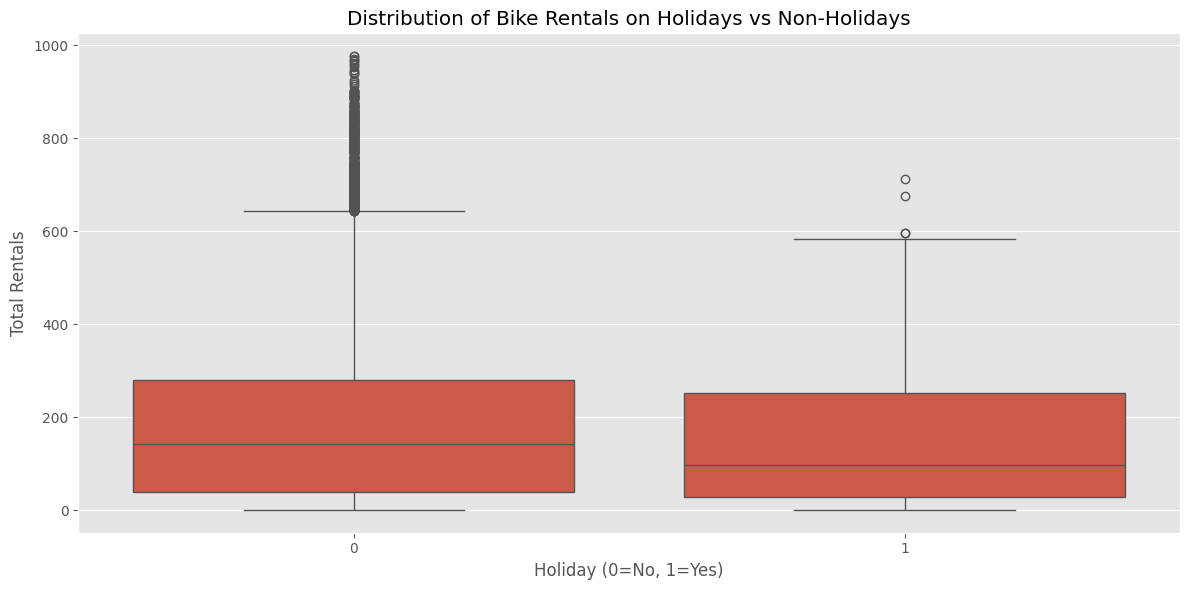

Numer of non-working days: 5514
Numer of working days: 11865


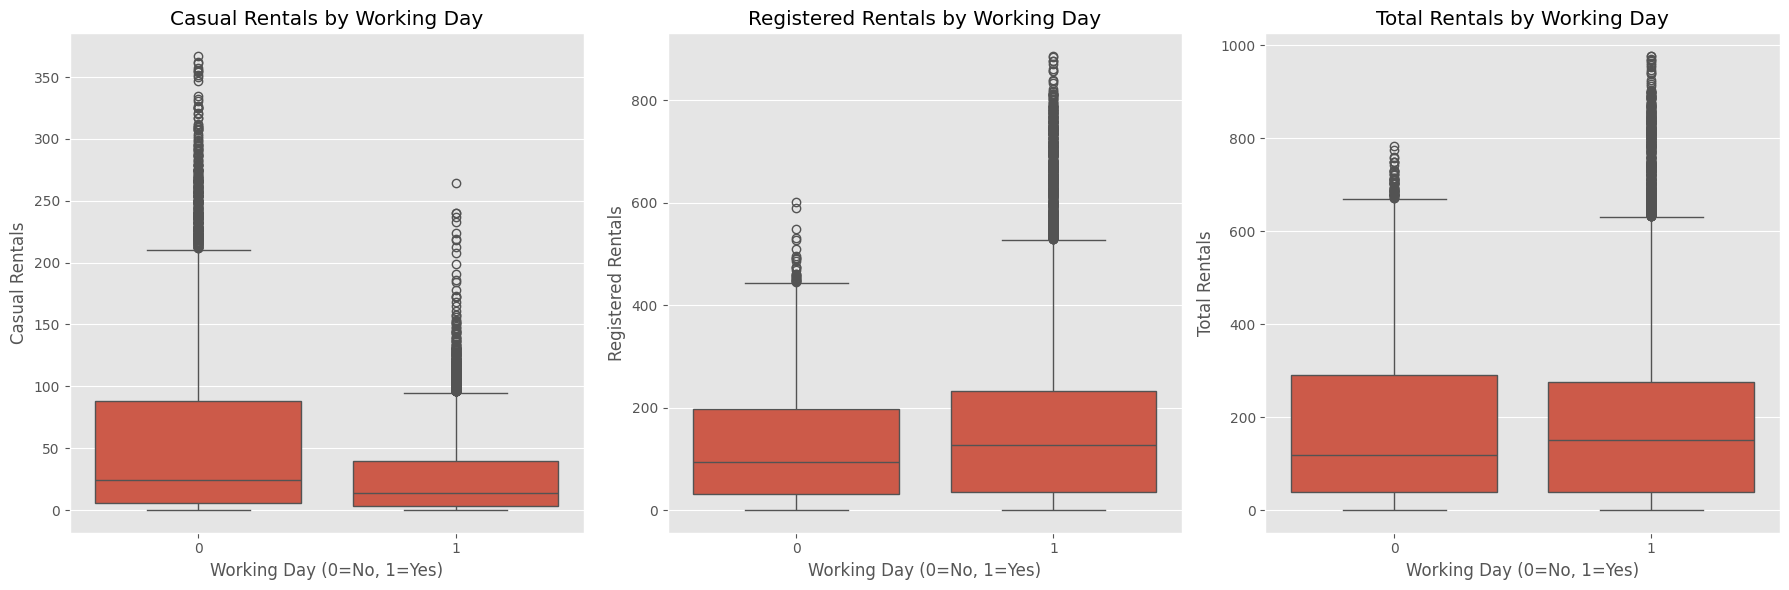

In [38]:
# HOLIDAY ANALYSIS

print(f"Numer of non-holidays: {data['holiday'].value_counts()[0]}")
print(f"Numer of holidays: {data['holiday'].value_counts()[1]}")
# This data imbalance might become problematic

plt.figure(figsize=(12, 6))
sns.boxplot(x='holiday', y='cnt', data=data)
plt.xlabel('Holiday (0=No, 1=Yes)')
plt.ylabel('Total Rentals')
plt.title('Distribution of Bike Rentals on Holidays vs Non-Holidays')
plt.tight_layout()
plt.show()


# WORKING DAY ANALYSIS

print(f"Numer of non-working days: {data['workingday'].value_counts()[0]}")
print(f"Numer of working days: {data['workingday'].value_counts()[1]}")
# This imbalance isn't too severe, but it's still important to keep in mind

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='workingday', y='casual', data=data, ax=axes[0])
axes[0].set_xlabel('Working Day (0=No, 1=Yes)')
axes[0].set_ylabel('Casual Rentals')
axes[0].set_title('Casual Rentals by Working Day')

sns.boxplot(x='workingday', y='registered', data=data, ax=axes[1])
axes[1].set_xlabel('Working Day (0=No, 1=Yes)')
axes[1].set_ylabel('Registered Rentals')
axes[1].set_title('Registered Rentals by Working Day')

sns.boxplot(x='workingday', y='cnt', data=data, ax=axes[2])
axes[2].set_xlabel('Working Day (0=No, 1=Yes)')
axes[2].set_ylabel('Total Rentals')
axes[2].set_title('Total Rentals by Working Day')

plt.tight_layout()
plt.show()

### Weather Features Analysis

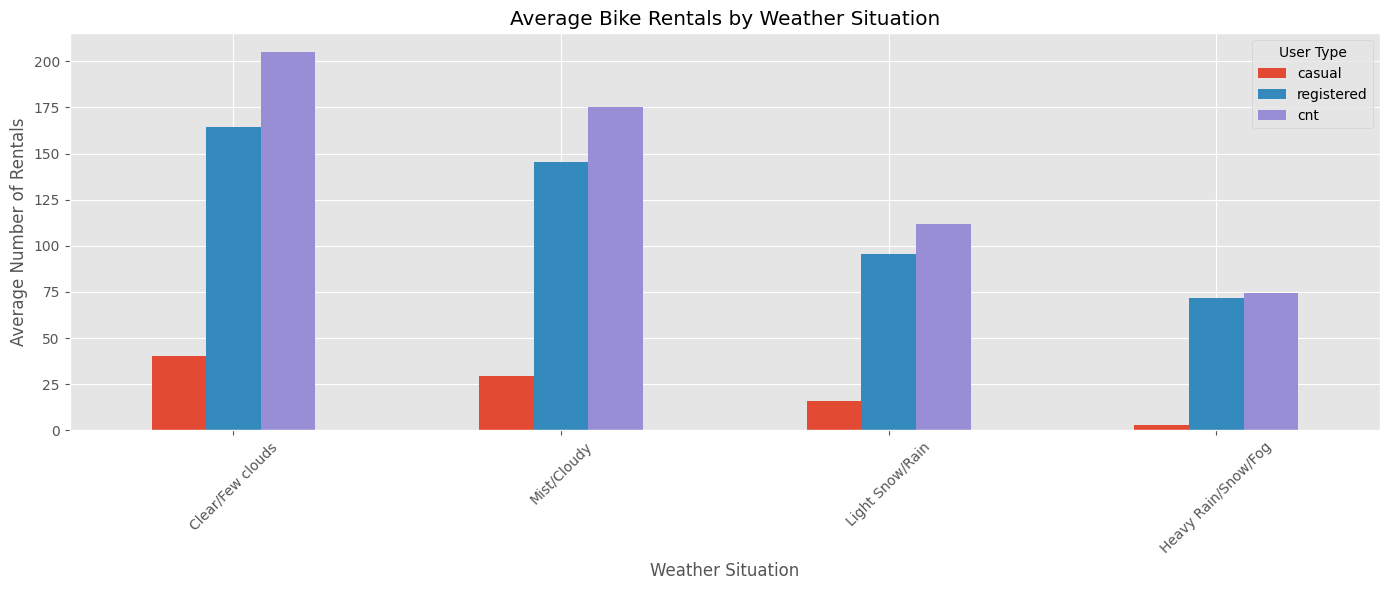

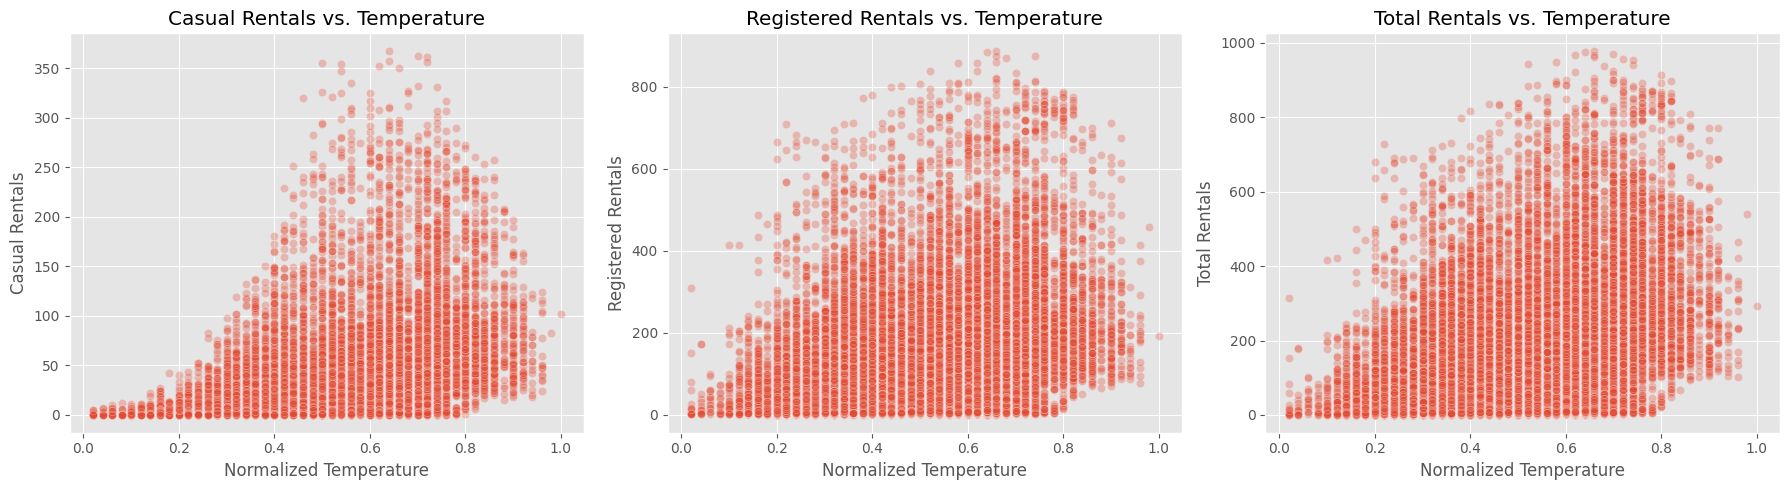

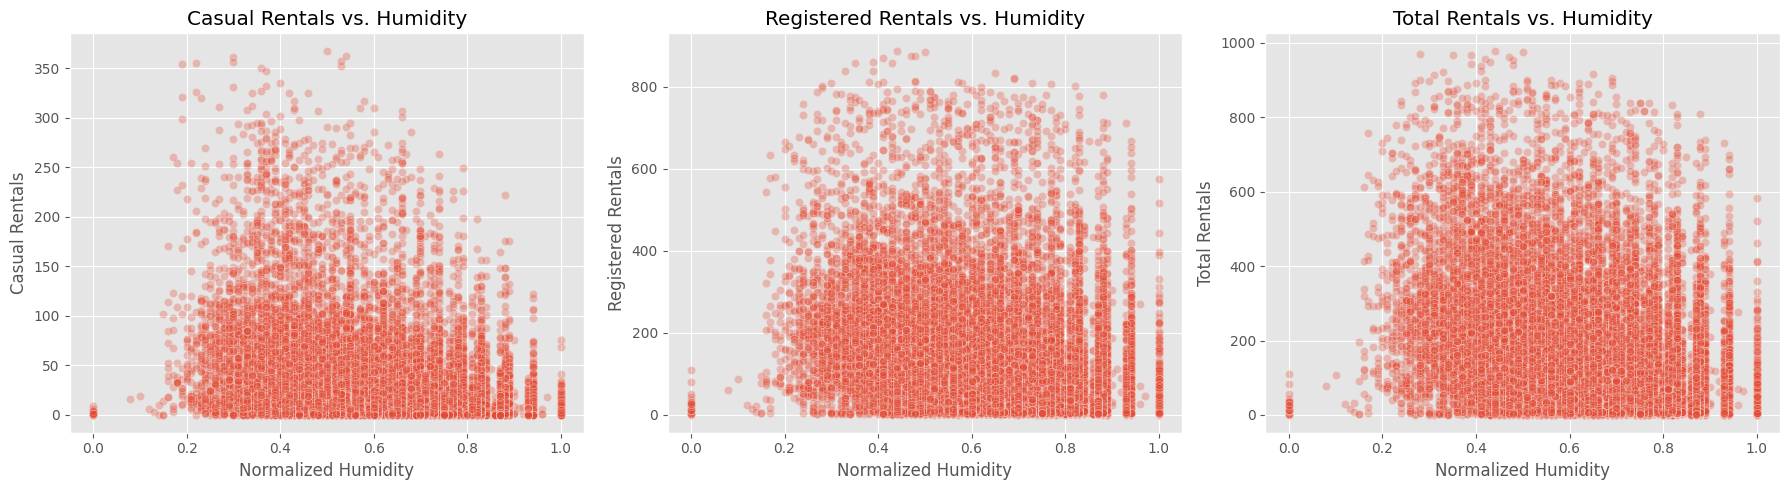

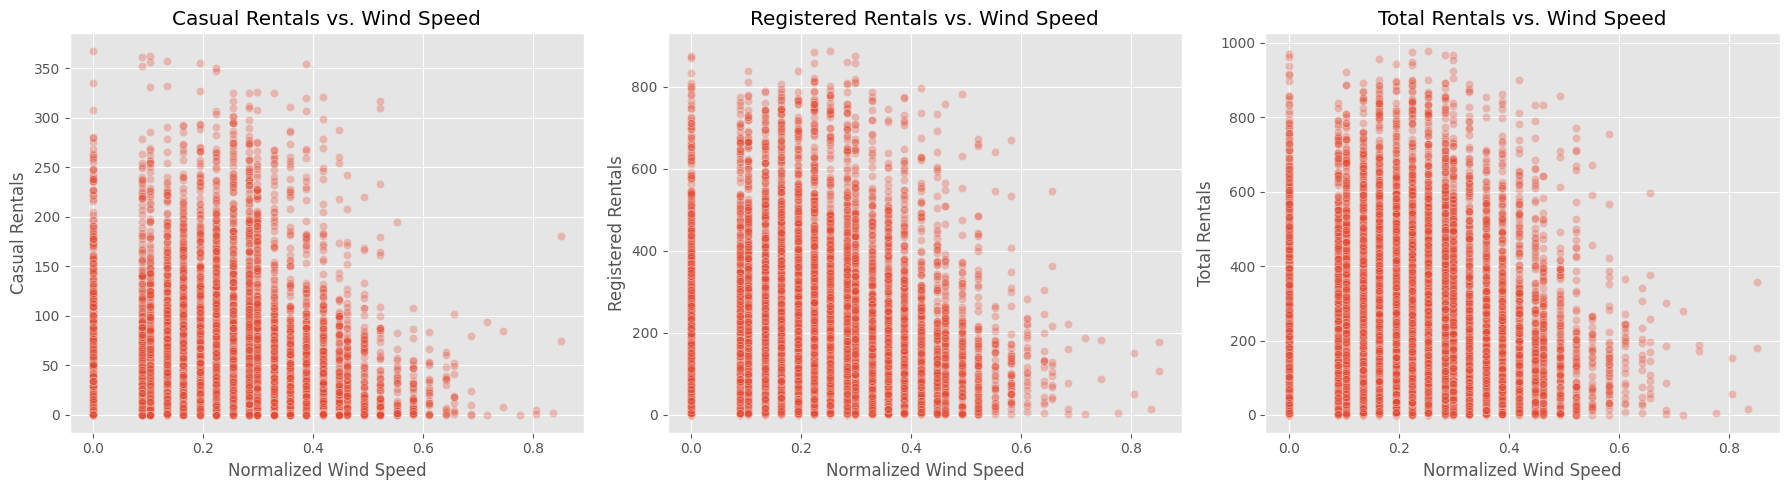

In [39]:
# WEATHER TYPE ANALYSIS
weather_data = data.groupby('weathersit')[['casual', 'registered', 'cnt']].mean()
weather_desc = {
    1: 'Clear/Few clouds', 
    2: 'Mist/Cloudy', 
    3: 'Light Snow/Rain', 
    4: 'Heavy Rain/Snow/Fog'
}
weather_data.index = [weather_desc[i] for i in weather_data.index]

plt.figure(figsize=(14, 6))
weather_data.plot(kind='bar', ax=plt.gca())
plt.xlabel('Weather Situation')
plt.ylabel('Average Number of Rentals')
plt.title('Average Bike Rentals by Weather Situation')
plt.legend(title='User Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# TEMPERATURE ANALYSIS
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(x='temp', y='casual', data=data, alpha=0.3, ax=axes[0])
axes[0].set_xlabel('Normalized Temperature')
axes[0].set_ylabel('Casual Rentals')
axes[0].set_title('Casual Rentals vs. Temperature')

sns.scatterplot(x='temp', y='registered', data=data, alpha=0.3, ax=axes[1])
axes[1].set_xlabel('Normalized Temperature')
axes[1].set_ylabel('Registered Rentals')
axes[1].set_title('Registered Rentals vs. Temperature')

sns.scatterplot(x='temp', y='cnt', data=data, alpha=0.3, ax=axes[2])
axes[2].set_xlabel('Normalized Temperature')
axes[2].set_ylabel('Total Rentals')
axes[2].set_title('Total Rentals vs. Temperature')

plt.tight_layout()
plt.show()

# HUMIDITY ANALYSIS
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(x='hum', y='casual', data=data, alpha=0.3, ax=axes[0])
axes[0].set_xlabel('Normalized Humidity')
axes[0].set_ylabel('Casual Rentals')
axes[0].set_title('Casual Rentals vs. Humidity')

sns.scatterplot(x='hum', y='registered', data=data, alpha=0.3, ax=axes[1])
axes[1].set_xlabel('Normalized Humidity')
axes[1].set_ylabel('Registered Rentals')
axes[1].set_title('Registered Rentals vs. Humidity')

sns.scatterplot(x='hum', y='cnt', data=data, alpha=0.3, ax=axes[2])
axes[2].set_xlabel('Normalized Humidity')
axes[2].set_ylabel('Total Rentals')
axes[2].set_title('Total Rentals vs. Humidity')

plt.tight_layout()
plt.show()

# WIND SPEED ANALYSIS
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(x='windspeed', y='casual', data=data, alpha=0.3, ax=axes[0])
axes[0].set_xlabel('Normalized Wind Speed')
axes[0].set_ylabel('Casual Rentals')
axes[0].set_title('Casual Rentals vs. Wind Speed')

sns.scatterplot(x='windspeed', y='registered', data=data, alpha=0.3, ax=axes[1])
axes[1].set_xlabel('Normalized Wind Speed')
axes[1].set_ylabel('Registered Rentals')
axes[1].set_title('Registered Rentals vs. Wind Speed')

sns.scatterplot(x='windspeed', y='cnt', data=data, alpha=0.3, ax=axes[2])
axes[2].set_xlabel('Normalized Wind Speed')
axes[2].set_ylabel('Total Rentals')
axes[2].set_title('Total Rentals vs. Wind Speed')

plt.tight_layout()
plt.show()

### EDA Conclusion

Before we can start with model training, lets remove some useless columns.
>- instant: This is just an index and serves no use.
>- dteday: As described earlier, this is the only non-numerical feature. Since the creators have already split this feature into season, year, month and hour, and enhanced it with holiday, weekday and workingday, we no longer need this column.
>- The casual and registered features are cnt, our target feature, split into two types. If our model trains off these columns this will obviously introduce data leakage, and we should therefore remove it.
>- Also, I added some dummy columns to assit with data visualization which we should also remove.

From the EDA, I was surprised to find the following relationships (and lack thereof):
>- The temporal features are all informative, except for days of the week. The number of rentals stays relativley concistent across the different days of the week, including weekends.
>- Surprisingly, the binary features do not have a large affect on the distribution of cnt. The core distribution of cnt under each binary feature does not change much (by core I mean the middle 75% of the data), only the number of outliers tends to change with working days and holidays. A large issue I found here, however, is the large class imbalance present the 'holiday' column. There were only 500 holidays, and 16,789 non-holidays. This leads me to believe the relationship deduced from this feature isn't very accurate, and I should either drop this column or address this imbalance later on.
>- The weather features lined up with my expectations pretty well. This is a large correlation between weather type and cnt, and a moderate correlation between windspeed and temperature with cnt. As predicted, humidity has a very limited affect on cnt. 

In [40]:
data.drop(columns=['instant', 'dteday', 'casual', 'registered', 'weekday_name', 'season_name', 'month_name'], inplace=True)
pre_split_data = data.copy()
pre_split_data.info()
pre_split_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.7 MB


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1
